In [244]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import os
import re
import json
from timeit import default_timer as timer
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Gather:

In [245]:
folder_name= 'files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [246]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response= requests.get(url)
with open(folder_name+"/twitter-archive-enhanced.csv", mode="wb") as file:
    file.write(response.content)

In [247]:
twitter_archive= pd.read_csv(folder_name+'/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [248]:
url1="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url1)
with open(folder_name+"/image-predictions.tsv",mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv(folder_name+"/image-predictions.tsv",sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [249]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [250]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
fails_dict = {}
count = 0 
start = timer()
with open(folder_name+'/tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('success')
            json.dump(tweet._json, f)
            f.write('\n')
            
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            continue
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
success
2: 892177421306343426
success
3: 891815181378084864
success
4: 891689557279858688
success
5: 891327558926688256
success
6: 891087950875897856
success
7: 890971913173991426
success
8: 890729181411237888
success
9: 890609185150312448
success
10: 890240255349198849
success
11: 890006608113172480
success
12: 889880896479866881
success
13: 889665388333682689
success
14: 889638837579907072
success
15: 889531135344209921
success
16: 889278841981685760
success
17: 888917238123831296
success
18: 888804989199671297
success
19: 888554962724278272
success
20: 888202515573088257
Fail
21: 888078434458587136
success
22: 887705289381826560
success
23: 887517139158093824
success
24: 887473957103951883
success
25: 887343217045368832
success
26: 887101392804085760
success
27: 886983233522544640
success
28: 886736880519319552
success
29: 886680336477933568
success
30: 886366144734445568
success
31: 886267009285017600
success
32: 886258384151887873
success
33: 8860541600590725

Fail
262: 842846295480000512
success
263: 842765311967449089
success
264: 842535590457499648
success
265: 842163532590374912
success
266: 842115215311396866
success
267: 841833993020538882
success
268: 841680585030541313
success
269: 841439858740625411
success
270: 841320156043304961
success
271: 841314665196081154
success
272: 841077006473256960
success
273: 840761248237133825
success
274: 840728873075638272
success
275: 840698636975636481
success
276: 840696689258311684
success
277: 840632337062862849
success
278: 840370681858686976
success
279: 840268004936019968
success
280: 839990271299457024
success
281: 839549326359670784
success
282: 839290600511926273
success
283: 839239871831150596
success
284: 838952994649550848
success
285: 838921590096166913
success
286: 838916489579200512
success
287: 838831947270979586
success
288: 838561493054533637
success
289: 838476387338051585
success
290: 838201503651401729
success
291: 838150277551247360
success
292: 838085839343206401
success
293

success
519: 810657578271330305
success
520: 810284430598270976
success
521: 810254108431155201
success
522: 809920764300447744
success
523: 809808892968534016
success
524: 809448704142938112
success
525: 809220051211603969
success
526: 809084759137812480
success
527: 808838249661788160
success
528: 808733504066486276
success
529: 808501579447930884
success
530: 808344865868283904
success
531: 808134635716833280
success
532: 808106460588765185
success
533: 808001312164028416
success
534: 807621403335917568
success
535: 807106840509214720
success
536: 807059379405148160
success
537: 807010152071229440
success
538: 806629075125202948
success
539: 806620845233815552
success
540: 806576416489959424
success
541: 806542213899489280
success
542: 806242860592926720
success
543: 806219024703037440
success
544: 805958939288408065
success
545: 805932879469572096
success
546: 805826884734976000
success
547: 805823200554876929
success
548: 805520635690676224
success
549: 805487436403003392
success


success
776: 776201521193218049
success
777: 776113305656188928
success
778: 776088319444877312
success
779: 775898661951791106
success
780: 775842724423557120
success
781: 775733305207554048
success
782: 775729183532220416
success
783: 775364825476165632
success
784: 775350846108426240
success
785: 775096608509886464
Fail
786: 775085132600442880
success
787: 774757898236878852
success
788: 774639387460112384
success
789: 774314403806253056
success
790: 773985732834758656
success
791: 773922284943896577
success
792: 773704687002451968
success
793: 773670353721753600
success
794: 773547596996571136
success
795: 773336787167145985
success
796: 773308824254029826
success
797: 773247561583001600
success
798: 773191612633579521
success
799: 772877495989305348
success
800: 772826264096874500
success
801: 772615324260794368
success
802: 772581559778025472
success
803: 772193107915964416
success
804: 772152991789019136
success
805: 772117678702071809
success
806: 772114945936949249
success
807

Rate limit reached. Sleeping for: 590


success
902: 758474966123810816
success
903: 758467244762497024
success
904: 758405701903519748
success
905: 758355060040593408
success
906: 758099635764359168
success
907: 758041019896193024
success
908: 757741869644341248
success
909: 757729163776290825
success
910: 757725642876129280
success
911: 757611664640446465
success
912: 757597904299253760
success
913: 757596066325864448
success
914: 757400162377592832
success
915: 757393109802180609
success
916: 757354760399941633
success
917: 756998049151549440
success
918: 756939218950160384
success
919: 756651752796094464
success
920: 756526248105566208
success
921: 756303284449767430
success
922: 756288534030475264
success
923: 756275833623502848
success
924: 755955933503782912
success
925: 755206590534418437
success
926: 755110668769038337
success
927: 754874841593970688
success
928: 754856583969079297
success
929: 754747087846248448
success
930: 754482103782404096
success
931: 754449512966619136
success
932: 754120377874386944
success


success
1154: 725729321944506368
success
1155: 725458796924002305
success
1156: 724983749226668032
success
1157: 724771698126512129
success
1158: 724405726123311104
success
1159: 724049859469295616
success
1160: 724046343203856385
success
1161: 724004602748780546
success
1162: 723912936180330496
success
1163: 723688335806480385
success
1164: 723673163800948736
success
1165: 723179728551723008
success
1166: 722974582966214656
success
1167: 722613351520608256
success
1168: 721503162398597120
success
1169: 721001180231503872
success
1170: 720785406564900865
success
1171: 720775346191278080
success
1172: 720415127506415616
success
1173: 720389942216527872
success
1174: 720340705894408192
success
1175: 720059472081784833
success
1176: 720043174954147842
success
1177: 719991154352222208
success
1178: 719704490224398336
success
1179: 719551379208073216
success
1180: 719367763014393856
success
1181: 719339463458033665
success
1182: 719332531645071360
success
1183: 718971898235854848
success
11

success
1403: 699423671849451520
success
1404: 699413908797464576
success
1405: 699370870310113280
success
1406: 699323444782047232
success
1407: 699088579889332224
success
1408: 699079609774645248
success
1409: 699072405256409088
success
1410: 699060279947165696
success
1411: 699036661657767936
success
1412: 698989035503689728
success
1413: 698953797952008193
success
1414: 698907974262222848
success
1415: 698710712454139905
success
1416: 698703483621523456
success
1417: 698635131305795584
success
1418: 698549713696649216
success
1419: 698355670425473025
success
1420: 698342080612007937
success
1421: 698262614669991936
success
1422: 698195409219559425
success
1423: 698178924120031232
success
1424: 697995514407682048
success
1425: 697990423684476929
success
1426: 697943111201378304
success
1427: 697881462549430272
success
1428: 697630435728322560
success
1429: 697616773278015490
success
1430: 697596423848730625
success
1431: 697575480820686848
success
1432: 697516214579523584
success
14

success
1652: 683498322573824003
success
1653: 683481228088049664
success
1654: 683462770029932544
success
1655: 683449695444799489
success
1656: 683391852557561860
success
1657: 683357973142474752
success
1658: 683142553609318400
success
1659: 683111407806746624
success
1660: 683098815881154561
success
1661: 683078886620553216
success
1662: 683030066213818368
success
1663: 682962037429899265
success
1664: 682808988178739200
success
1665: 682788441537560576
success
1666: 682750546109968385
success
1667: 682697186228989953
success
1668: 682662431982772225
success
1669: 682638830361513985
success
1670: 682429480204398592
success
1671: 682406705142087680
success
1672: 682393905736888321
success
1673: 682389078323662849
success
1674: 682303737705140231
success
1675: 682259524040966145
success
1676: 682242692827447297
success
1677: 682088079302213632
success
1678: 682059653698686977
success
1679: 682047327939461121
success
1680: 682032003584274432
success
1681: 682003177596559360
success
16

Rate limit reached. Sleeping for: 572


success
1802: 676957860086095872
success
1803: 676949632774234114
success
1804: 676948236477857792
success
1805: 676946864479084545
success
1806: 676942428000112642
success
1807: 676936541936185344
success
1808: 676916996760600576
success
1809: 676897532954456065
success
1810: 676864501615042560
success
1811: 676821958043033607
success
1812: 676819651066732545
success
1813: 676811746707918848
success
1814: 676776431406465024
success
1815: 676617503762681856
success
1816: 676613908052996102
success
1817: 676606785097199616
success
1818: 676603393314578432
success
1819: 676593408224403456
success
1820: 676590572941893632
success
1821: 676588346097852417
success
1822: 676582956622721024
success
1823: 676575501977128964
success
1824: 676533798876651520
success
1825: 676496375194980353
success
1826: 676470639084101634
success
1827: 676440007570247681
success
1828: 676430933382295552
success
1829: 676263575653122048
success
1830: 676237365392908289
success
1831: 676219687039057920
success
18

success
2051: 671497587707535361
success
2052: 671488513339211776
success
2053: 671486386088865792
success
2054: 671485057807351808
success
2055: 671390180817915904
success
2056: 671362598324076544
success
2057: 671357843010908160
success
2058: 671355857343524864
success
2059: 671347597085433856
success
2060: 671186162933985280
success
2061: 671182547775299584
success
2062: 671166507850801152
success
2063: 671163268581498880
success
2064: 671159727754231808
success
2065: 671154572044468225
success
2066: 671151324042559489
success
2067: 671147085991960577
success
2068: 671141549288370177
success
2069: 671138694582165504
success
2070: 671134062904504320
success
2071: 671122204919246848
success
2072: 671115716440031232
success
2073: 671109016219725825
success
2074: 670995969505435648
success
2075: 670842764863651840
success
2076: 670840546554966016
success
2077: 670838202509447168
success
2078: 670833812859932673
success
2079: 670832455012716544
success
2080: 670826280409919488
success
20

success
2300: 667065535570550784
success
2301: 667062181243039745
success
2302: 667044094246576128
success
2303: 667012601033924608
success
2304: 666996132027977728
success
2305: 666983947667116034
success
2306: 666837028449972224
success
2307: 666835007768551424
success
2308: 666826780179869698
success
2309: 666817836334096384
success
2310: 666804364988780544
success
2311: 666786068205871104
success
2312: 666781792255496192
success
2313: 666776908487630848
success
2314: 666739327293083650
success
2315: 666701168228331520
success
2316: 666691418707132416
success
2317: 666649482315059201
success
2318: 666644823164719104
success
2319: 666454714377183233
success
2320: 666447344410484738
success
2321: 666437273139982337
success
2322: 666435652385423360
success
2323: 666430724426358785
success
2324: 666428276349472768
success
2325: 666421158376562688
success
2326: 666418789513326592
success
2327: 666411507551481857
success
2328: 666407126856765440
success
2329: 666396247373291520
success
23

In [251]:
# For loop to append each tweet into a list
tweets_data = []

with open(folder_name+'/tweet_json.txt', "r") as tweet_file:
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
        

In [252]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()
# Add selected variables to tweet_info DataFrame
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## ASSESS:

In [253]:
twitter_archive_assess = twitter_archive.copy()
image_predictions_assess = image_predictions.copy()
tweet_info_assess = tweet_info.copy()

In [254]:
# View first 10 rows of twitter_archive DataFrame
twitter_archive_assess.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [255]:
# View last 10 rows of twitter_archive DataFrame
twitter_archive_assess.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

In [256]:
# View info of twitter_archive DataFrame
twitter_archive_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [257]:
# View descriptive statistics of twitter_archive DataFrame
twitter_archive_assess.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [258]:
# View number of entries for each source
twitter_archive_assess.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [259]:
# View first 5 rows of image_predictions DataFrame
image_predictions_assess.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [260]:
# View last 5 rows of image_predictions DataFrame
image_predictions_assess.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [261]:
# View info of image_predictions DataFrame
image_predictions_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [262]:
# View descriptive statistics of image_predictions DataFrame
image_predictions_assess.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [263]:
# View first 5 rows of tweet_info DataFrame
tweet_info_assess.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8292,37963
1,892177421306343426,6123,32599
2,891815181378084864,4054,24545
3,891689557279858688,8432,41301
4,891327558926688256,9132,39494
5,891087950875897856,3039,19847
6,890971913173991426,2012,11598
7,890729181411237888,18392,64043
8,890609185150312448,4176,27256
9,890240255349198849,7195,31274


In [264]:
# View last 5 rows of tweet_info DataFrame
tweet_info_assess.tail(10)

,tweet_id,retweet_count,favorite_count
2330,666058600524156928,57,109
2331,666057090499244032,138,290
2332,666055525042405380,235,429
2333,666051853826850816,831,1200
2334,666050758794694657,59,130
2335,666049248165822465,43,106
2336,666044226329800704,138,293
2337,666033412701032449,43,123
2338,666029285002620928,47,125
2339,666020888022790149,499,2532


In [265]:
# View info of tweet_info DataFrame
tweet_info_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [266]:
# View descriptive statistics of tweet_info DataFrame
tweet_info_assess.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2919.717521,7945.129915
std,6.832564e+16,4919.094484,12306.835473
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,585.000000,1370.750000
50%,7.186224e+17,1362.000000,3453.500000
75%,7.986954e+17,3401.250000,9721.000000
max,8.924206e+17,83371.000000,163917.000000


## Tidiness
- Join 'tweet_info' and 'image_predictions' Dataframes to 'twitter_archive' DataFrame
- Combine  the four columns: doggo, floofer, pupper, puppo into one column 'dog_stage' 

## Quality
- Remove rows where there are no images
- Remove 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
- Change incorrect dog names.
- Missing values in 'name' and dog stages showing as 'None'
- Rating numerators with decimals not showing full float
- Tweet with more than one #/# sometimes have the first occurence erroneously used for the rating numerators and denominators
- Tweet ID# 810984652412424192 doesn't contain a rating
- Extra characters after '&'
- Change sources to more readable categories.
- Erroneous datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)





## Clean:

## Tidiness:

In [267]:
# Create copies of original DataFrames to work off of
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Define:

Create dog stage variable and remove the individual dog stage columns.

### Code:


In [268]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
# Create variable of columns that are no longer needed and drop them from the DataFrame 
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test:

In [269]:
twitter_archive_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


### Define:

Merge tweet_info and image_predictions to twitter_archive table.

### Code:

In [270]:
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_info_clean, on=['tweet_id','tweet_id'], how='inner')

In [271]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

### Test:

In [272]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
dog_stage                     338 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non

## Quality:

### Define:

Remove rows where there are no images (expanded_urls).

### Code:

In [273]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

### Test:

In [274]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0

In [275]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
dog_stage                     338 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non

### Define:

Remove retweets.

### Code:

In [276]:
len(twitter_archive_clean['retweeted_status_id'].isnull())

2067

In [277]:
# Select rows where 'retweeted_status_id' is null to save to twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

### Test:

In [278]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null object
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
dog_stage                     326 non-null object
retweet_count                 1992 non-null int64
favorite_count                1992 non-null int64
jpg_url                       1992 non-null object
img_num                       1992 non-nu

### Define:

Remove retweeted columns.

### Code:

In [279]:
# drop columns related to retweets
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test:

In [280]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                326 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992

### Define:

Display full content of 'text' column.

### Code:

In [281]:
# to increase the visibility of columns and set column width to infinite so entire content of 'text' column is displayed
pd.set_option("display.max_columns",24)
pd.set_option("display.max_colwidth",-1)

### Test:

In [282]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1088,707297311098011648,NaN,NaN,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK,"https://twitter.com/dog_rates/status/707297311098011648/photo/1,https://twitter.com/dog_rates/status/707297311098011648/photo/1",10,10,Cassie,NaN,841,2887,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
630,774314403806253056,NaN,NaN,2016-09-09 18:31:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpfxIH,"https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1",14,10,None,NaN,6042,23107,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo_dog,0.596045,True,Siberian_husky,0.223067,True,Saluki,0.036325,True
552,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/ibj5g6xaAj,https://twitter.com/dog_rates/status/786963064373534720/photo/1,12,10,Rory,NaN,8714,28384,https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg,1,golden_retriever,0.915303,True,Saluki,0.046213,True,Labrador_retriever,0.037504,True
1669,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kendall. 12/10 would cuddle the hell out of https://t.co/fJulMurnfj,https://twitter.com/dog_rates/status/673662677122719744/photo/1,12,10,Kendall,NaN,370,1274,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
218,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps://t.co/JesYTzb1Jo https://t.co/5cncH08G1o,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12,10,Maddie,NaN,1864,9356,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True


### Define:

Change incorrect dog names.

### Code:

In [283]:
# Save locations where 'name' column is lowercase, lowercase and 'text' column contains 'named' and lowercase and 'text'
# column contains the words 'name is'
named_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('named'))]
name_is_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('name is'))]
not_named_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower())]
# Save these locations as lists
named_to_replace_list = named_to_replace['text'].tolist()
name_is_to_replace_list = name_is_to_replace['text'].tolist()
not_named_to_replace_list = not_named_to_replace['text'].tolist()

if var2 == var3:
    var1 = True
else:
    var1 = False

In [284]:
# For loop to iterate through locations where name is lowercase and the words 'named' appear in 'text' and set the 'name' 
# value to be the word that appears after 'named'
for entry in named_to_replace_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# For loop to iterate through locations where name is lowercase and the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'    
for entry in name_is_to_replace_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in not_named_to_replace_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = "None"

In [285]:
# Replace the occurence of "O" with "O'Malley"
twitter_archive_clean.name = twitter_archive_clean.name.replace("O", "O'Malley")

### Test:

In [286]:
twitter_archive_clean.name.sort_values()

831     Abby        
842     Abby        
763     Ace         
1650    Acro        
1104    Adele       
1651    Aiden       
66      Aja         
379     Akumi       
659     Al          
707     Albert      
1670    Albert      
119     Albus       
324     Albus       
914     Aldrick     
1761    Alejandro   
294     Alexander   
986     Alexanderson
384     Alf         
1359    Alfie       
691     Alfie       
1950    Alfie       
287     Alfie       
46      Alfy        
1436    Alice       
159     Alice       
1254    Amber       
1111    Ambrose     
1793    Amy         
1908    Amélie      
624     Anakin      
         ...        
209     Winnie      
631     Winnie      
1031    Winston     
1552    Winston     
803     Winston     
222     Winston     
448     Winston     
656     Winston     
320     Winston     
1848    Winston     
709     Wishes      
1216    Wyatt       
322     Wyatt       
143     Wyatt       
1150    Yoda        
492     Yogi        
38      Yogi 

In [287]:
twitter_archive_clean.loc[(twitter_archive_clean.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [288]:
twitter_archive_clean[twitter_archive_clean.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
619,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN,2734,10191,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


### Define:

Change missing values in 'name' from 'None' to NaN (dog stages already covered).

### Code:

In [289]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', 'NaN')

### Test:

In [290]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                326 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992

### Define:

Change sources to more readable categories.

### Code:

In [291]:
# Remove url from sources
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [292]:
# Change datatype to category
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

### Test:

In [293]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1954
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [294]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                326 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  19

### Define:

Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

### Code:

In [295]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('str')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('str')

### Test:

In [296]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf       

### Define:

Remove tweet without rating.

### Code:

In [297]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]

### Test:

In [298]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define:

Fix rating numerator and denominators that are not actually ratings and removing the duplicate of tweet_id 740373189193256964.

### Code:

In [299]:
# View all occurences where there are more than one #/# in 'text' column and disable warnings
warnings.simplefilter('ignore')
twitter_archive_clean[twitter_archive_clean['text'].str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,777684233540206592,nan,nan,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,NaN,3202,11927,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
820,747600769478692864,nan,nan,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,NaN,586,2432,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
871,740373189193256964,nan,nan,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,14144,36377,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
962,722974582966214656,nan,nan,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,1660,4272,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
996,716439118184652801,nan,nan,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,223,2463,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1012,714258258790387713,nan,nan,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,NaN,757,3142,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1134,703356393781329922,nan,nan,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,NaN,409,1999,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1224,695064344191721472,nan,nan,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,NaN,NaN,637,1680,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1229,694352839993344000,nan,nan,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d

In [300]:
# Save the text where the rating numerator and denomiq1nators were incorrectly extracted
ratings_to_fix =['This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ',
                 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
                 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
                 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
                 'This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf',
                'Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c',
                'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
                'Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C',
                'These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC',
                'Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh',
                'Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD',
                'Meet Eve. She"'"s a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can"'"t condone) https://t.co/U36HYQIijg',
                '10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k',
                 'Meet Holly. She"'"s trying to teach small human-like pup about blocks but he"'"s not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu',
                 "This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv"
                 
                ]

In [301]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.
for entry in ratings_to_fix:
    mask = twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_archive_clean.loc[mask, column_name2] = 10

### Test:

In [302]:

twitter_archive_clean[twitter_archive_clean['text'].str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,777684233540206592,nan,nan,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,NaN,3202,11927,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
820,747600769478692864,nan,nan,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",7,10,Bookstore,NaN,586,2432,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
871,740373189193256964,nan,nan,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,NaN,14144,36377,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
962,722974582966214656,nan,nan,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,NaN,1660,4272,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
996,716439118184652801,nan,nan,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,NaN,223,2463,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1012,714258258790387713,nan,nan,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,NaN,757,3142,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1134,703356393781329922,nan,nan,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,2,10,Socks,NaN,409,1999,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1224,695064344191721472,nan,nan,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,NaN,NaN,637,1680,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1229,694352839993344000,nan,nan,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a 

In [303]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null object
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf      

### Define:

Remove extra characters after '&' in twitter_archive_clean['text'].

### Code:

In [304]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

### Test:

In [305]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define:

Fix rating numerator that have decimals.

### Code:

In [306]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,nan,nan,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN,9693,44989,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
553,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,6655,19396,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
609,778027034220126208,nan,nan,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN,1761,6964,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1446,680494726643068929,nan,nan,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,pupper,510,1791,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [310]:
# Set correct numerators for specific tweets
twitter_archive_clean.loc[40, ['rating_numerator']]=13.5
twitter_archive_clean.loc[553, ['rating_numerator']]=9.75
twitter_archive_clean.loc[609, ['rating_numerator']]=11.27
twitter_archive_clean.loc[1446, ['rating_numerator']]=11.26

In [311]:
# Change datatype of rating_numerator and denominator to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')

### Test:

In [314]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,nan,nan,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,NaN,9693,44989,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
553,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,NaN,6655,19396,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
609,778027034220126208,nan,nan,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,NaN,1761,6964,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1446,680494726643068929,nan,nan,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,pupper,510,1791,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


## Store:

In [315]:
# Save the clean DataFrame to folder files
twitter_archive_clean.to_csv('files/twitter_archive_master.csv')

## Analyze:

In [316]:
# using specific columns for analysis
df = twitter_archive_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()
df.set_index('timestamp', inplace=True)

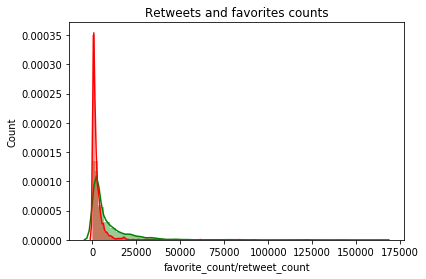

In [317]:
sns.distplot(df.favorite_count, color = 'green')
sns.distplot(df.retweet_count, color = 'red')
plt.xlabel('favorite_count/retweet_count')
plt.ylabel('Count')
plt.title('Retweets and favorites counts')
plt.savefig('files/retweets_favorites_count.png')
plt.show()

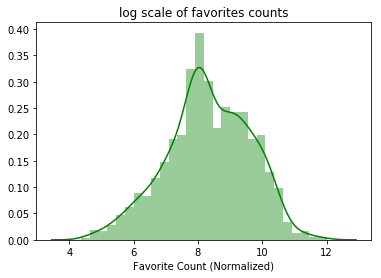

In [318]:

sns.distplot(df.favorite_count.apply(np.log), color = 'green', axlabel='Favorite Count (Normalized)')
plt.title('log scale of favorites counts')
plt.savefig('files/log_favorite_count.png')

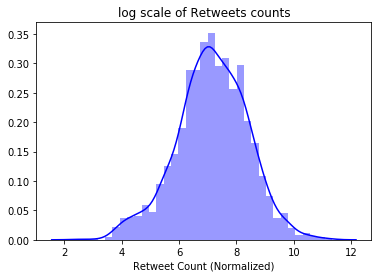

In [319]:
sns.distplot(df.retweet_count.apply(np.log), color = 'blue',axlabel='Retweet Count (Normalized)')
plt.title('log scale of Retweets counts')
plt.savefig('files/log_retweet_count.png')

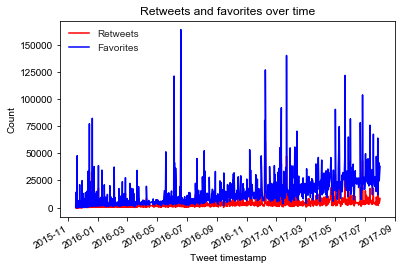

In [320]:
#plotting Retweets and favorites over time
df.retweet_count.plot(color = 'red', label='Retweets')
df.favorite_count.plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('files/retweets_favorites.png')
plt.show()

In [321]:
#will give the relation between columns
df.corr()

,retweet_count,favorite_count,rating_numerator,rating_denominator
retweet_count,1.000000,0.929559,0.018349,-0.019294
favorite_count,0.929559,1.000000,0.016190,-0.026230
rating_numerator,0.018349,0.016190,1.000000,0.197699
rating_denominator,-0.019294,-0.026230,0.197699,1.000000
